In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, make_scorer,accuracy_score,classification_report



p_train=pd.read_csv(r"C:\Users\User\Downloads\machineProject\Train.csv.csv")

p_test=pd.read_csv(r"C:\Users\User\Downloads\machineProject\Test.csv.csv")



In [2]:
p_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
p_train.info()

# We're dealing with an 9557x143 dataframe, using 10.4MB of memory. A fairly large database to kaggle parameters
# Most values are int, some are categorical and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
p_train.describe()

# There are many columns that are hot one encoded categorical features
# Which is visible by their min, 75% and max values

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [5]:
cols_nan = p_train.isna().sum()
print(cols_nan.where(cols_nan > 0).dropna().astype('int32'))

# Only a few columns with missing data. Since there are 9557 entries total, the columns with over 6000 missing entries will likely be dropped
# The columns with 5 missing entries will be further investigated

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int32


In [6]:
# We can fill the NaN values as 0 for tipovivi1


p_train.loc[(p_train['tipovivi1'] == 1), 'v2a1'] = 0
p_test.loc[(p_test['tipovivi1'] == 1), 'v2a1'] = 0

p_train['v2a1-missing'] = p_train['v2a1'].isnull()
p_test['v2a1-missing'] = p_test['v2a1'].isnull()

p_train['v2a1'].fillna(0, inplace=True)
p_test['v2a1'].fillna(0, inplace=True)

In [7]:
# The third feature with missing values is rez_esc
# It represents the years behind in school the individual has
# The most plausible hypothesis is that the NaN values represents individuals that are not behind in school

p_train.loc[p_train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [8]:
p_train.loc[p_train['rez_esc'].isnull()]['age'].describe()

# The competition describes the rez_esc feature only taking in consideration people between the ages 7-19
# Anything under 7 or over 19 will be assumed to have no years behind in school

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [9]:
p_train.loc[((p_train['age'] > 19) | (p_train['age'] < 7)) & (p_train['rez_esc'].isnull()), 'rez_esc'] = 0
p_test.loc[((p_test['age'] > 19) | (p_test['age'] < 7)) & (p_test['rez_esc'].isnull()), 'rez_esc'] = 0

# For those in the 7 to 19 range and still have missing value, it makes sense to imput with 0 as well
# But its good practice to create the imputed flag column, to flag our assumption

p_train['rez_esc-missing'] = p_train['rez_esc'].isnull()
p_test['rez_esc-missing'] = p_test['rez_esc'].isnull()

# Now that the flag column has been created, we can finish filling all the missing values

p_train['rez_esc'].fillna(0, inplace=True)
p_test['rez_esc'].fillna(0, inplace=True)

# The competition also describes as the maximum years behind school is 5. So anything over it will be considered an outlier

p_train.loc[p_train['rez_esc'] > 5, 'rez_esc'] = 5
p_test.loc[p_test['rez_esc'] > 5, 'rez_esc'] = 5

In [10]:
cols_nan = p_train.isna().sum()
print(cols_nan.where(cols_nan > 0).dropna().astype('int32'))

# Now all thats left is meaneduc and SQBmeaned
# meaneduc shows the average years of education on adults (18+)
# SQBmeaned shows the square of the mean years of education of adults (18+) in the household

v18q1        7342
meaneduc        5
SQBmeaned       5
dtype: int32


In [11]:
# First lets check if the NaN values in both columns correspond to the same indexes

nan_index = p_train[p_train['meaneduc'].isna()].index
print(nan_index)
print(p_train[p_train['SQBmeaned'].isna()].index)

# Same indexes, so they refer to the same individuals

house_with_nan = p_train.loc[p_train['meaneduc'].isnull(), 'idhogar'].value_counts()

print('-'*25)
print(house_with_nan)

print('-'*25)
print(p_train.loc[p_train['idhogar'].isin(house_with_nan.index), ['age']])

# All individuals with null values are 18 or 19 years old
# They are the only individuals in the household



Int64Index([1291, 1840, 1841, 2049, 2050], dtype='int64')
Int64Index([1291, 1840, 1841, 2049, 2050], dtype='int64')
-------------------------
a874b7ce7    2
faaebf71a    2
1b31fd159    1
Name: idhogar, dtype: int64
-------------------------
      age
1291   18
1840   18
1841   18
2049   19
2050   19


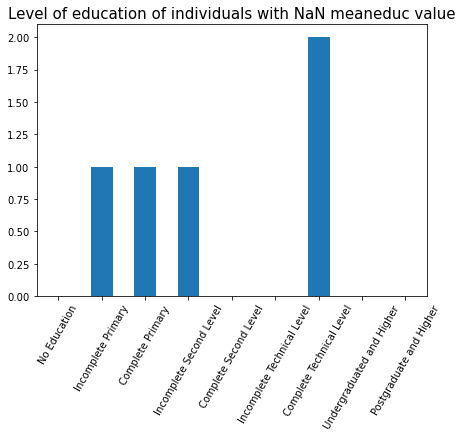

In [12]:
# Lets check the level of education of these 5 individuals

edu_series = p_train.columns.to_series().str.contains('instlevel')
edu_var = edu_series.where(edu_series != False).dropna().index.to_list()

p_train.loc[p_train['meaneduc'].isnull(), edu_var].sum().plot.bar(figsize = (7, 5))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8],
           ['No Education', 'Incomplete Primary', 'Complete Primary', 'Incomplete Second Level', 'Complete Second Level', 'Incomplete Technical Level', 'Complete Technical Level', 'Undergraduated and Higher', 'Postgraduate and Higher'],
          rotation = 60)
plt.title('Level of education of individuals with NaN meaneduc value', size = 15);

# So we have a variety of education levels to these 5 individuals

In [13]:
# For each of them, we'll impute the median value for that specific education level

def impute_median(index, df):
    
    df_t = (df.loc[df.index == index, edu_var]).transpose()
    instlevel = df_t[df_t == 1].dropna().index.values
    
    
    mdmed = df.loc[df[instlevel[0]] == 1, 'meaneduc'].median()
    sqmed = df.loc[df[instlevel[0]] == 1, 'SQBmeaned'].median()
        
    df.loc[df.index == index, 'meaneduc'] = mdmed
    df.loc[df.index == index, 'SQBmeaned'] = sqmed

In [14]:
for df in [p_train, p_test]: 
    nan_index = df[df['meaneduc'].isna()].index
    for j in nan_index:
        impute_median(j, df)

In [15]:
cols_nan = p_train.isna().sum()
print(cols_nan.where(cols_nan > 0).dropna().astype('int32'))

# All NaN values in the dataset has been dealt with

v18q1    7342
dtype: int32


In [16]:
# In the dataframe, each column represents one individual. The predictions must be made based on households
# Each individual has its household identified by the idhogar column, and the head of the household is identified as parentesco1 = 1
# Every individual in a same household must share the same Target feature in the train database, since its household based

check_target = p_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print(check_target)
print('-'*25)
dif_target = check_target[check_target != True] 
print(len(dif_target))
print('-'*25)
print(p_train['parentesco1'].sum())
print('-'*25)
print(p_train.groupby('idhogar')['parentesco1'].apply(lambda x: x.sum() > 1).sum())
# There are 2988 total households in the dataset
# 85 of these households have more than 1 target value for the residents
# There are 2988 different households and 2973 heads, so we have 15 households without a household head
# There are no household with multiple heads

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool
-------------------------
85
-------------------------
2973
-------------------------
0


In [17]:
# There are a series of squared feature columns
# These can be useful when using a simple linear model, but to more complex models, it tends to be prejudicial by making the model overfit
# So these features will be dropped

SQBcol = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
train = p_train.drop(SQBcol, axis=1)
test = p_test.drop(SQBcol, axis=1)

In [18]:
# There are many columns that are one hot encoded features, and others that are clearly correlated
# For the hot one encoded, we'll try to create a single ordinal column, when we can define a clear order for the values
# We'll also focus on features house related, since the resident related must be aggregated into house related as well

def mc(dic, colname):
    for df in [train, test]:
        for i in dic:
            df.loc[df[i] == 1, colname] = dic[i]

In [19]:
# Now for the floor type columns

train['floortype'] = 0
test['floortype'] = 0

floor_dt = {
    'pisonotiene': 1,
    'pisoother': 2,
    'pisonatur': 2,
    'pisocemento': 3,
    'pisomadera': 4,
    'pisomoscer': 5,  
}

mc(floor_dt, 'floortype')

for i in floor_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)
    
# The number of entries that matches pisoother, pisonatur and pisonotiene are too few
# Since all of them represent low quality floor, to avoid overfitting they will be joined in a single category

In [20]:
# Now for the roof

# cielorazo gives 1 if a house HAS a roof. We want a column that is True when it DOES NOT

train['nothaveroof'] = 0
train.loc[train['cielorazo'] == 0, 'nothaveroof'] = 1
train = train.drop('cielorazo', axis=1)

test['nothaveroof'] = 0
test.loc[test['cielorazo'] == 0, 'nothaveroof'] = 1
test = test.drop('cielorazo', axis=1)


train['rooftype'] = 0
test['rooftype'] = 0

roof_dt = {
    'nothaveroof': 1,
    'techootro': 2,
    'techocane': 2,
    'techoentrepiso': 3,
    'techozinc': 4
}

mc(roof_dt, 'rooftype')

for i in roof_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)

# The number of entries that matches techootro and techocane are too few
# Since all of them represent low quality ceiling, to avoid overfitting they will be joined in a single category

In [21]:
# Now for water provision

train['waterprov'] = 0
test['waterprov'] = 0

water_dt = {
    'abastaguano' : 1,
    'abastaguafuera' : 2,
    'abastaguadentro' : 3
}
  
mc(water_dt, 'waterprov')

for i in water_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)
    


In [22]:
# Electricity Source

train['elecsource'] = 0
test['elecsource'] = 0

elec_dt = {
    'noelec' : 1,
    'planpri' : 2,
    'coopele' : 2,
    'public' : 3,
}
  
mc(elec_dt, 'elecsource')

for i in elec_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)

In [23]:
# Toilet Dwelling

train['toiletdwel'] = 0
test['toiletdwel'] = 0

toilet_dt = {
    'sanitario1' : 1,
    'sanitario5' : 2,
    'sanitario6' : 3,
    'sanitario3' : 3,
    'sanitario2' : 4
}
  
mc(toilet_dt, 'toiletdwel')

for i in toilet_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)

In [24]:
# Cooking Energy Source

train['cookingsource'] = 0
test['cookingsource'] = 0

cook_dt = {
    'energcocinar1' : 1,
    'energcocinar4' : 2,
    'energcocinar3' : 3,
    'energcocinar2' : 4,
}
  
mc(cook_dt, 'cookingsource')

for i in cook_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)
    

In [25]:
# Rubbish Disposal

train['rubbishdisp'] = 0
test['rubbishdisp'] = 0

rubbish_dt = {
    'elimbasu6' : 1,
    'elimbasu5' : 2,
    'elimbasu4' : 1,
    'elimbasu3' : 3,
    'elimbasu2' : 1,
    'elimbasu1' : 4
}
  
mc(rubbish_dt, 'rubbishdisp')

for i in rubbish_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)

In [26]:
# Own House Status

# This feature will be divided into owned or not, and the precarious feature will remain as a separated one

train = train.rename(columns = {'tipovivi4': 'isprecarious'})
test = test.rename(columns = {'tipovivi4': 'isprecarious'})

                     
train['houseowned'] = 0
test['houseowned'] = 0

houseown_dt = {
    'tipovivi5' : 0,
    'tipovivi3' : 0,
    'tipovivi2' : 1,
    'tipovivi1' : 1,
}
  
mc(houseown_dt, 'houseowned')

for i in houseown_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)

In [27]:
# Removing reduntant area column

train = train.rename(columns = {'area1': 'isurban'})
test = test.rename(columns = {'area1': 'isurban'})

train = train.drop('area2', axis=1)
test = test.drop('area2', axis=1)

In [28]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,v2a1-missing,rez_esc-missing,floortype,rooftype,waterprov,elecsource,toiletdwel,cookingsource,rubbishdisp,houseowned
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,False,False,5,3,3,3,4,3,4,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,False,False,4,4,3,3,4,4,4,0
2,ID_68de51c94,0.0,0,8,0,1,1,0,NaN,0,...,False,False,5,4,3,3,4,4,4,1
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,False,False,5,4,3,3,4,4,4,0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,False,False,5,4,3,3,4,4,4,0


In [29]:
train[['dependency', 'edjefe', 'edjefa']].head(10)

,dependency,edjefe,edjefa
0,no,10,no
1,8,12,no
2,8,no,11
3,yes,11,no
4,yes,11,no
5,yes,11,no
6,yes,11,no
7,yes,9,no
8,yes,9,no
9,yes,9,no


In [30]:
train['n_depend'] = 0
train['n_indep'] = 0

n_dep = train[['age', 'idhogar']].loc[(train['age'] < 19) | (train['age'] > 64)].groupby('idhogar').count()
n_ind = train[['age', 'idhogar']].loc[(train['age'] >= 19) & (train['age'] <= 64)].groupby('idhogar').count()


for i in n_dep.index:
    train.loc[train['idhogar'] == i, 'n_depend'] = int(n_dep.loc[n_dep.index == i, 'age'].values)
    
for i in n_ind.index:
    train.loc[train['idhogar'] == i, 'n_indep'] = int(n_ind.loc[n_ind.index == i, 'age'].values)
        
train['dependencynew'] = train['n_depend']/train['n_indep']
train.loc[train['dependencynew'] == np.inf, 'dependencynew'] = 10

train[['idhogar', 'n_depend', 'n_indep', 'age']].head(10)

,idhogar,n_depend,n_indep,age
0,21eb7fcc1,0,1,43
1,0e5d7a658,1,0,67
2,2c7317ea8,1,0,92
3,2b58d945f,2,2,17
4,2b58d945f,2,2,37
5,2b58d945f,2,2,38
6,2b58d945f,2,2,8
7,d6dae86b7,2,2,7
8,d6dae86b7,2,2,30
9,d6dae86b7,2,2,28


In [31]:
train = train.drop(['n_depend', 'n_indep', 'dependency'], axis=1)

In [32]:
test['n_depend'] = 0
test['n_indep'] = 0

n_dep = test[['age', 'idhogar']].loc[(test['age'] < 19) | (test['age'] > 64)].groupby('idhogar').count()
n_ind = test[['age', 'idhogar']].loc[(test['age'] >= 19) & (test['age'] <= 64)].groupby('idhogar').count()

In [33]:
for i in n_dep.index:
    test.loc[test['idhogar'] == i, 'n_depend'] = int(n_dep.loc[n_dep.index == i, 'age'].values)


In [34]:
for i in n_ind.index:
    test.loc[test['idhogar'] == i, 'n_indep'] = int(n_ind.loc[n_ind.index == i, 'age'].values)

In [35]:
test['dependencynew'] = test['n_depend']/test['n_indep']
test.loc[test['dependencynew'] == np.inf, 'dependencynew'] = 10

test[['idhogar', 'n_depend', 'n_indep', 'age']].head(10)

,idhogar,n_depend,n_indep,age
0,72958b30c,1,2,4
1,72958b30c,1,2,41
2,72958b30c,1,2,41
3,5b598fbc9,0,1,59
4,1e2fc704e,1,0,18
5,8ee7365a8,0,2,38
6,8ee7365a8,0,2,42
7,ff69a6fc8,0,2,21
8,ff69a6fc8,0,2,22
9,b61e2bb92,1,0,70


In [36]:
test = test.drop(['n_depend', 'n_indep', 'dependency'], axis=1)

In [37]:
train[['edjefe', 'edjefa']].value_counts()

# edjefe and edjefa seem to have the same weird problem, with both columns
# We'll remake these two columns as well
# They will be converted into one

edjefe  edjefa
6       no        1845
no      6          947
11      no         751
9       no         486
no      no         435
        11         399
3       no         307
15      no         285
8       no         257
no      9          237
7       no         234
5       no         222
no      8          217
14      no         208
17      no         202
2       no         194
no      15         188
        7          179
        5          176
        3          152
4       no         137
no      4          136
16      no         134
yes     no         123
no      14         120
12      no         113
no      16         113
10      no         111
13      no         103
no      10          96
        2           84
        17          76
        12          72
        yes         69
        13          52
21      no          43
18      no          19
19      no          14
20      no           7
no      21           5
        19           4
        18           3
        20         

In [38]:
train['headescolari'] = 0
test['headescolari'] = 0

train.loc[train['parentesco1'] == 1, 'headescolari'] = train['escolari']
test.loc[test['parentesco1'] == 1, 'headescolari'] = test['escolari']

train = train.drop(['edjefe', 'edjefa'], axis=1)
test = test.drop(['edjefe', 'edjefa'], axis=1)


In [39]:
train.dtypes

Id                object
v2a1             float64
hacdor             int64
rooms              int64
hacapo             int64
                  ...   
cookingsource      int64
rubbishdisp        int64
houseowned         int64
dependencynew    float64
headescolari       int64
Length: 105, dtype: object

In [40]:
# We converted into ordinal all columns household related where the trend was clear
# Now lets do the same for columns in individual level

# The variables r4 shows a clear correlation and redundancy others
# Sex and Age are already given by different columns
# A column showing whether someone is under or over 12 could be useful though
# So all columns will be dropped except r4t1 and r4t3

drop_cols = ['r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t2']
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [41]:
# Civil State

train['civilstate'] = 0
test['civilstate'] = 0

civil_dt = {
    'estadocivil1' : 1,
    'estadocivil2' : 3,
    'estadocivil3' : 4,
    'estadocivil4' : 5,
    'estadocivil5' : 5,
    'estadocivil6' : 6,
    'estadocivil7' : 2
}
  
mc(civil_dt, 'civilstate')

for i in civil_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)

In [42]:
train['civilstate'].value_counts()

2    3275
4    2565
1    1317
3    1178
5     905
6     317
Name: civilstate, dtype: int64

In [43]:
# We'll drop all the columns of kinship besides parentesco1, since they are individual features without huge relevance

drop_cols = ['parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

train = train.rename(columns = {'parentesco1': 'ishousehead'})
test = test.rename(columns = {'parentesco1': 'ishousehead'})

In [44]:
# Individual education

train['education'] = 0
test['education'] = 0

educ_dt = {
    'instlevel1' : 1,
    'instlevel2' : 2,
    'instlevel3' : 3,
    'instlevel4' : 4,
    'instlevel5' : 5,
    'instlevel6' : 6,
    'instlevel7' : 7,
    'instlevel8' : 8,
    'instlevel9' : 9
}
  
mc(educ_dt, 'education')

for i in educ_dt:
    train = train.drop(i, axis=1)
    test = test.drop(i, axis=1)

In [45]:
train['education'].value_counts()

3    1985
4    1772
2    1630
8    1336
1    1287
5    1077
6     171
7     149
9     147
0       3
Name: education, dtype: int64

In [46]:
train.loc[train['education'] == 0, 'education'] = 1

In [47]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4t1', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc',
       'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes',
       'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'epared1',
       'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2',
       'eviv3', 'dis', 'male', 'female', 'ishousehead', 'idhogar', 'hogar_nin',
       'hogar_adul', 'hogar_mayor', 'hogar_total', 'meaneduc', 'bedrooms',
       'overcrowding', 'isprecarious', 'computer', 'television', 'mobilephone',
       'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5',
       'lugar6', 'isurban', 'age', 'Target', 'v2a1-missing', 'rez_esc-missing',
       'floortype', 'rooftype', 'waterprov', 'elecsource', 'toiletdwel',
       'cookingsource', 'rubbishdisp', 'houseowned', 'dependencynew',
       'headescolari', 'civilstate', 'education'],
      dtype='object')

In [48]:
# It seems that Having a Tablet, a Computer, Number of Tablets and of Mobile Phones are the variables with higher correlation with Target
# Lets try aggregating the number of computers, tablets and mobile phones into a new feature and see if it represents a higher correlation

train['sumelectronics'] = train[['qmobilephone', 'v18q1', 'computer']].apply(np.sum, axis=1)
test['sumelectronics'] = test[['qmobilephone', 'v18q1', 'computer']].apply(np.sum, axis=1)

In [49]:
# We managed to create a feature with higher correlation than the others separately, so this feature will substitute the others

drop_cols = ['refrig', 'v18q', 'v18q1', 'computer', 'television', 'mobilephone', 'qmobilephone']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [50]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'r4t1', 'r4t3',
       'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'paredblolad',
       'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc',
       'paredfibras', 'paredother', 'epared1', 'epared2', 'epared3', 'etecho1',
       'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male',
       'female', 'ishousehead', 'idhogar', 'hogar_nin', 'hogar_adul',
       'hogar_mayor', 'hogar_total', 'meaneduc', 'bedrooms', 'overcrowding',
       'isprecarious', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5',
       'lugar6', 'isurban', 'age', 'Target', 'v2a1-missing', 'rez_esc-missing',
       'floortype', 'rooftype', 'waterprov', 'elecsource', 'toiletdwel',
       'cookingsource', 'rubbishdisp', 'houseowned', 'dependencynew',
       'headescolari', 'civilstate', 'education', 'sumelectronics'],
      dtype='object')

In [51]:
train[['tamhog', 'hhsize']]
train[['tamviv', 'hogar_total']]

train = train.drop(['hhsize', 'hogar_total'], axis=1)
test = test.drop(['hhsize', 'hogar_total'], axis=1)


# Duplicated Column

In [52]:
# Dependency column already makes the relation between dependent and independent individuals in the household
# The columns indicating the number of individuals of each age will be dropped

drop_cols = ['hogar_nin', 'hogar_adul', 'hogar_mayor']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [53]:
train[['hacdor', 'rooms', 'hacapo', 'tamviv', 'bedrooms', 'overcrowding']].head(20)

,hacdor,rooms,hacapo,tamviv,bedrooms,overcrowding
0,0,3,0,1,1,1.000000
1,0,4,0,1,1,1.000000
2,0,8,0,1,2,0.500000
3,0,5,0,4,3,1.333333
4,0,5,0,4,3,1.333333
5,0,5,0,4,3,1.333333
6,0,5,0,4,3,1.333333
7,1,2,0,4,1,4.000000
8,1,2,0,4,1,4.000000
9,1,2,0,4,1,4.000000


In [54]:
train['hacapo'].value_counts()

0    9331
1     226
Name: hacapo, dtype: int64

In [55]:
train.loc[train['hacapo'] == 1]

,Id,v2a1,hacdor,rooms,hacapo,v14a,r4t1,r4t3,tamhog,tamviv,...,elecsource,toiletdwel,cookingsource,rubbishdisp,houseowned,dependencynew,headescolari,civilstate,education,sumelectronics
23,ID_848b0fdf1,100000.0,1,1,1,0,0,3,3,3,...,3,1,4,4,0,0.00,6,4,3,3.0
24,ID_298d857e5,100000.0,1,1,1,0,0,3,3,3,...,3,1,4,4,0,0.00,0,5,8,3.0
25,ID_1d5bf8ddf,100000.0,1,1,1,0,0,3,3,3,...,3,1,4,4,0,0.00,0,4,7,3.0
144,ID_912ff9986,0.0,1,3,1,1,0,10,10,10,...,3,3,2,4,1,0.25,0,2,3,5.0
145,ID_3f1c6eec1,0.0,1,3,1,1,0,10,10,10,...,3,3,2,4,1,0.25,0,2,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,ID_05fff291e,0.0,1,2,1,1,2,6,6,6,...,3,3,2,1,1,2.00,0,3,3,1.0
9358,ID_9df6542eb,0.0,1,2,1,1,2,6,6,6,...,3,3,2,1,1,2.00,0,2,4,1.0
9359,ID_26c172c8c,0.0,1,2,1,1,2,6,6,6,...,3,3,2,1,1,2.00,0,2,2,1.0
9360,ID_b327c80dd,0.0,1,2,1,1,2,6,6,6,...,3,3,2,1,1,2.00,0,2,2,1.0


In [56]:
train[['overcrowding', 'hacapo', 'hacdor', 'tamviv', 'rooms', 'tamhog']]

,overcrowding,hacapo,hacdor,tamviv,rooms,tamhog
0,1.000000,0,0,1,3,1
1,1.000000,0,0,1,4,1
2,0.500000,0,0,1,8,1
3,1.333333,0,0,4,5,4
4,1.333333,0,0,4,5,4
...,...,...,...,...,...,...
9552,1.250000,0,0,5,6,5
9553,1.250000,0,0,5,6,5
9554,1.250000,0,0,5,6,5
9555,1.250000,0,0,5,6,5


In [57]:
train['rooms'].value_counts()

5     2940
4     2587
6     1607
3      890
7      732
8      298
2      188
9      168
1       97
10      43
11       7
Name: rooms, dtype: int64

In [58]:
train['tamhog'].value_counts()

4     2451
3     2258
5     1590
2     1362
6      819
1      386
7      364
8       96
9       90
10      60
11      44
12      24
13      13
Name: tamhog, dtype: int64

<AxesSubplot:>

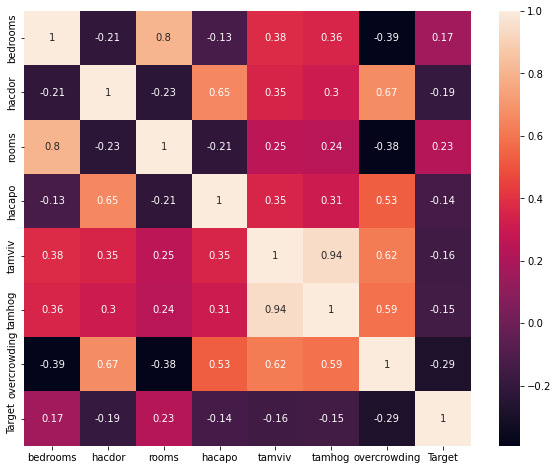

In [59]:
# There are some columns related to the size of the house and the number of persons in the house
# We'll aggregate all these columns in a new feature that represents the number of people/size of the house

overcrowd_df = train[['bedrooms', 'hacdor', 'rooms', 'hacapo', 'tamviv', 'tamhog', 'overcrowding', 'Target']]

corr_matrix = overcrowd_df.corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)

In [60]:
# No combination were able to create a feature with higher correlation than overcrowding
# So it will be preserved
# The others will be dropped

col_drops = ['bedrooms', 'hacdor', 'rooms', 'hacapo', 'tamviv', 'tamhog']

train['overcrowding'] = train['overcrowding'].apply(lambda x: round(x, 1))
test['overcrowding'] = test['overcrowding'].apply(lambda x: round(x, 1))

train = train.drop(col_drops, axis=1)
test = test.drop(col_drops, axis=1)

In [61]:
train.head()

,Id,v2a1,v14a,r4t1,r4t3,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,...,elecsource,toiletdwel,cookingsource,rubbishdisp,houseowned,dependencynew,headescolari,civilstate,education,sumelectronics
0,ID_279628684,190000.0,1,0,1,10,0.0,1,0,0,...,3,4,3,4,0,0.0,10,5,4,1.0
1,ID_f29eb3ddd,135000.0,1,0,1,12,0.0,0,0,0,...,3,4,4,4,0,10.0,12,5,8,2.0
2,ID_68de51c94,0.0,1,0,1,11,0.0,0,0,0,...,3,4,4,4,1,10.0,11,6,5,0.0
3,ID_d671db89c,180000.0,1,1,4,9,1.0,1,0,0,...,3,4,4,4,0,1.0,0,2,4,4.0
4,ID_d56d6f5f5,180000.0,1,1,4,11,0.0,1,0,0,...,3,4,4,4,0,1.0,0,3,5,4.0


In [62]:
# We will rebuild the dis column into a feature that sums the total of disable people in the house

train['totaldisabled'] = 0

tot_dis = train.groupby('idhogar')['dis'].apply(np.sum, axis=0)

for i in tot_dis.index:
    train.loc[train['idhogar'] == i, 'totaldisabled'] = int(tot_dis.loc[tot_dis.index == i].values)

In [63]:
train[['totaldisabled', 'Target']].corr()

train = train.drop('totaldisabled', axis=1)

# The correlation is still to low to be worth keeping the columns

In [64]:
# We'll do the same to rez_esc

train['totalrezesc'] = 0

tot_dis = train.groupby('idhogar')['rez_esc'].apply(np.sum, axis=0)

for i in tot_dis.index:
    train.loc[train['idhogar'] == i, 'totalrezesc'] = int(tot_dis.loc[tot_dis.index == i].values)

In [65]:
train[['totalrezesc', 'Target']].corr()

train = train.drop('totalrezesc', axis=1)

# The correlation is still to low to be worth keeping the columns

In [66]:
train.head()

,Id,v2a1,v14a,r4t1,r4t3,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,...,elecsource,toiletdwel,cookingsource,rubbishdisp,houseowned,dependencynew,headescolari,civilstate,education,sumelectronics
0,ID_279628684,190000.0,1,0,1,10,0.0,1,0,0,...,3,4,3,4,0,0.0,10,5,4,1.0
1,ID_f29eb3ddd,135000.0,1,0,1,12,0.0,0,0,0,...,3,4,4,4,0,10.0,12,5,8,2.0
2,ID_68de51c94,0.0,1,0,1,11,0.0,0,0,0,...,3,4,4,4,1,10.0,11,6,5,0.0
3,ID_d671db89c,180000.0,1,1,4,9,1.0,1,0,0,...,3,4,4,4,0,1.0,0,2,4,4.0
4,ID_d56d6f5f5,180000.0,1,1,4,11,0.0,1,0,0,...,3,4,4,4,0,1.0,0,3,5,4.0


In [67]:
# We now will drop the last of the features individual related

drop_cols = ['escolari', 'rez_esc', 'rez_esc-missing', 'dis', 'male', 'female', 'age', 'civilstate', 'education']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [68]:
train.shape

(9557, 47)

In [69]:
test.shape

(23856, 46)

In [70]:

# We already built enough features, now lets analyse the correlation of each one to target and keep dropping redundant features

corr_matrix = train.corr()
print(corr_matrix['Target'].sort_values(ascending=False))

# We will drop most of the features that is between 0.2 and -0.2, unless we have a good reason to keep it


drop_cols = ['cookingsource', 'v2a1', 'toiletdwel', 'rubbishdisp', 'isurban', 'waterprov', 'v14a', 'houseowned', 'rooftype', 'elecsource', 'r4t3', 'v2a1-missing', 'Id','idhogar']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

train = train.rename(columns = {'r4t1': 'numchilds', 'dependencynew' : 'dependency'})
test = test.rename(columns = {'r4t1': 'numchilds', 'dependencynew' : 'dependency'})


Target            1.000000
meaneduc          0.335110
eviv3             0.294222
epared3           0.292451
floortype         0.273167
sumelectronics    0.264639
paredblolad       0.261274
etecho3           0.257378
cookingsource     0.196131
lugar1            0.173359
v2a1              0.166942
headescolari      0.132692
rubbishdisp       0.129377
toiletdwel        0.121378
houseowned        0.088243
isurban           0.087131
waterprov         0.077769
v14a              0.063382
rooftype          0.059949
ishousehead       0.037903
elecsource        0.024678
paredother       -0.000629
lugar2           -0.018523
paredfibras      -0.027730
lugar6           -0.043413
paredzinc        -0.051806
lugar4           -0.076784
paredzocalo      -0.079199
pareddes         -0.082923
lugar3           -0.086227
lugar5           -0.089619
paredpreb        -0.099002
isprecarious     -0.117094
etecho2          -0.139205
v2a1-missing     -0.143441
r4t3             -0.147548
dependencynew    -0.156558
p

In [71]:
train.head()

,numchilds,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,epared1,...,lugar2,lugar3,lugar4,lugar5,lugar6,Target,floortype,dependency,headescolari,sumelectronics
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,5,0.0,10,1.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,4,4,10.0,12,2.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,4,5,10.0,11,0.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,5,1.0,0,4.0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,5,1.0,0,4.0


In [72]:
test.head()

,numchilds,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,epared1,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,floortype,dependency,headescolari,sumelectronics
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,5,0.5,0,3.0
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,5,0.5,0,3.0
2,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,5,0.5,17,3.0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,5,0.0,16,4.0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,5,10.0,11,2.0


**Applying RondomForest**

In [73]:
y = train['Target']
X = train.drop('Target', axis=1)

#Checking shape of X and y
print("Shape of X is {}, and shape of y is {}".format(X.shape, y.shape))

#Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)

Shape of X is (9557, 32), and shape of y is (9557,)


In [74]:
#instantiating the Random Forest Classifier with n_estimator as 150
forest_m= RandomForestClassifier(n_estimators=150)

#Fitting the model
forest_m.fit(X_train,y_train)

#Predicting the y_pred_test
y_pred_test = forest_m.predict(X_test)

In [75]:
#Checking accuracy score, confusion matrix and classification report on test data
print("Accuracy score of forest on test dataset is : ")
print(accuracy_score(y_test, y_pred_test))



Accuracy score of forest on test dataset is : 
0.9518828451882845


In [76]:
print(confusion_matrix(y_test, y_pred_test))

[[ 69   4   0   5]
 [  3 137   0  12]
 [  1   3 102  14]
 [  0   1   3 602]]


In [77]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.95      0.88      0.91        78
           2       0.94      0.90      0.92       152
           3       0.97      0.85      0.91       120
           4       0.95      0.99      0.97       606

    accuracy                           0.95       956
   macro avg       0.95      0.91      0.93       956
weighted avg       0.95      0.95      0.95       956



**Applying K-Neighbors**

In [78]:
kneigh_m= KNeighborsClassifier( n_neighbors=5, weights='distance')
kneigh_m.fit(X_train,y_train)
y_pred = kneigh_m.predict(X_test)
print("Accuracy score of KNeighborModel on test dataset is : ")
print(accuracy_score(y_test, y_pred_test))

Accuracy score of KNeighborModel on test dataset is : 
0.9518828451882845


In [79]:
print(confusion_matrix(y_test, y_pred_test))

[[ 69   4   0   5]
 [  3 137   0  12]
 [  1   3 102  14]
 [  0   1   3 602]]


In [80]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.95      0.88      0.91        78
           2       0.94      0.90      0.92       152
           3       0.97      0.85      0.91       120
           4       0.95      0.99      0.97       606

    accuracy                           0.95       956
   macro avg       0.95      0.91      0.93       956
weighted avg       0.95      0.95      0.95       956



**Applying DecisionTree**

In [81]:
dtree_m = DecisionTreeClassifier(criterion='gini', max_depth=69,  splitter='random')
dtree_m.fit(X_train, y_train)
y_pred = dtree_m.predict(X_test)
result = f1_score(y_pred, y_test, average='macro')
print(result)

0.9345581237701401


In [82]:
print(confusion_matrix(y_test, y_pred_test))

[[ 69   4   0   5]
 [  3 137   0  12]
 [  1   3 102  14]
 [  0   1   3 602]]


In [83]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.95      0.88      0.91        78
           2       0.94      0.90      0.92       152
           3       0.97      0.85      0.91       120
           4       0.95      0.99      0.97       606

    accuracy                           0.95       956
   macro avg       0.95      0.91      0.93       956
weighted avg       0.95      0.95      0.95       956

